# Import necessary module

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle    
%matplotlib inline

# Reading the file

In [382]:
df= pd.read_csv("iris.data", header=None,names=['sepal_length','sepal_width','petal_length','petal_width','class'] )
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [383]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [384]:
df['class'] = df['class'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}).astype(int)

In [569]:
train_df,test_df=train_test_split(df) # 75% of the data for traininng and 25% of the data for testing
print(len(train_df))

print(len(test_df))

112
38


In [570]:
train_df.to_csv("train_df.csv",index=None)
test_df.to_csv("test_df.csv",index=None)

## Loading Training data

In [571]:
train_df = pd.read_csv("train_df.csv")
train_df

y_train=train_df['class']

train_df.drop(['class'],1,inplace=True)

x_train=train_df.copy()

x_train

,sepal_length,sepal_width,petal_length,petal_width
0,6.5,3.0,5.8,2.2
1,6.9,3.1,4.9,1.5
2,5.6,2.5,3.9,1.1
3,5.5,2.4,3.7,1.0
4,5.4,3.4,1.5,0.4
...,...,...,...,...
107,5.9,3.2,4.8,1.8
108,6.1,2.8,4.7,1.2
109,5.2,3.5,1.5,0.2
110,6.1,2.9,4.7,1.4


## Question 2

## Define KNN Model 

In [572]:
KNN=KNeighborsClassifier(
    n_neighbors=5,
    radius=1.0,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    n_jobs=None,
)

## Deine Decition Tree Model

In [573]:
DT=DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)

## Function to train the model

In [574]:
def model_train(model,x_train,y_train):
    fit=model.fit(x_train,y_train)
    return (fit)

## Train KNN

In [575]:
KNN_fit=model_train(KNN,x_train,y_train)
pickle.dump(KNN_fit, open('KNN.sav', 'wb'))

## Train Decision Tree 

In [576]:
DT_fit=model_train(DT,x_train,y_train)
pickle.dump(DT_fit, open('DT.sav', 'wb'))

## Loading test data

In [577]:
test_df = pd.read_csv("test_df.csv")

y_test=test_df['class']

test_df.drop(['class'],1,inplace=True)

x_test=test_df.copy()


## Testing model accuracy 

In [578]:
## Defining a fucntion to estimate the accruacy for any mode
def test_model(model,x_test,y_test):
    accuracy = model.score(x_test, y_test)
    y_pred=model.predict(x_test)
    report=classification_report(y_test, y_pred)
    confusion_mat=confusion_matrix(y_test,y_pred)
    return ({"accuracy":accuracy,"report":report, "confusion_matrix":confusion_mat})

#### KNN model

In [579]:
##load the save model
loaded_model = pickle.load(open('KNN.sav', 'rb'))            ## for decision tree put DT.sav
result = test_model(loaded_model, x_test, y_test)

In [580]:
## save the results
with open('knn_result.pickle', 'wb') as w:
    pickle.dump(result, w)
    
## load the results
with open('knn_result.pickle', 'rb') as r:
    b = pickle.load(r)
    
b

{'accuracy': 0.9736842105263158,
 'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.93      0.97        15\n           2       0.93      1.00      0.96        13\n\n    accuracy                           0.97        38\n   macro avg       0.98      0.98      0.98        38\nweighted avg       0.98      0.97      0.97        38\n',
 'confusion_matrix': array([[10,  0,  0],
        [ 0, 14,  1],
        [ 0,  0, 13]], dtype=int64)}

#### Decision Tree

In [581]:
loaded_model = pickle.load(open('DT.sav', 'rb'))            ## for decision tree put DT.sav

result = test_model(loaded_model, x_test, y_test)

## save the results
with open('DT_result.pickle', 'wb') as w:
    pickle.dump(result, w)
    
## load the results
with open('DT_result.pickle', 'rb') as r:
    b = pickle.load(r)

b

{'accuracy': 0.9736842105263158,
 'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.93      0.97        15\n           2       0.93      1.00      0.96        13\n\n    accuracy                           0.97        38\n   macro avg       0.98      0.98      0.98        38\nweighted avg       0.98      0.97      0.97        38\n',
 'confusion_matrix': array([[10,  0,  0],
        [ 0, 14,  1],
        [ 0,  0, 13]], dtype=int64)}

## Question 2

### Cross Validation

In [740]:
from sklearn.model_selection import KFold 
from sklearn.utils import shuffle
import random
from scipy.stats import pearsonr

In [741]:
iris = datasets.load_iris()

In [742]:
df=pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['class']=iris.target

In [743]:
plot_df=df[df['class']==2]


(0.45722781639411314, 0.000843462472370877)

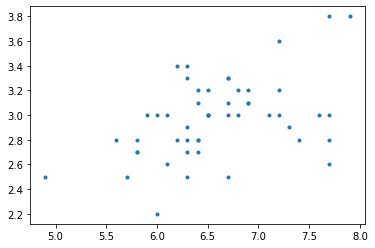

In [744]:
plt.plot(plot_df['sepal_length'], plot_df['sepal_width'],'.')
pearsonr(plot_df['sepal_length'], plot_df['sepal_width'])

In [745]:
cv = KFold(n_splits=5)

In [746]:
x=df.copy()
y=df['class']
x.drop(['class'],1, inplace=True)

In [747]:
x, y = shuffle(x.values, y.values, random_state = 112)

#x_train, y_train = shuffle(x_train, y_train, random_state = 112)

In [748]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [749]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [758]:
# 5-fold cross validation train test split check
n_max=20 ## maximum number of neighbors
n_neighbors= list(range(1,21,1))

accuracy_dt_tr_list = []

accuracy_dt_list = []

accuracy_knn_list = [[] for i in range(n_max)]

accuracy_knn_list_tr = [[] for i in range(n_max)]


for i, j in cv.split(df):
    print(len(i))
    print(len(j))
    x_train_cv, x_test_cv = x[i], x[j]
    y_train_cv, y_test_cv = y[i], y[j]
    print(y_test_cv)
    clf_DT=DecisionTreeClassifier (
    criterion='entropy')
    clf_DT.fit(x_train_cv,y_train_cv)
    accuracy_dt_tr=clf_DT.score(x_train_cv, y_train_cv)
    accuracy_dt=clf_DT.score(x_test_cv, y_test_cv)
    accuracy_dt_list.append(accuracy_dt)
    accuracy_dt_tr_list.append(accuracy_dt_tr)
    for k in range(n_max):
        clf_knn=KNeighborsClassifier(n_neighbors=k+1)
        clf_knn.fit(x_train_cv,y_train_cv)
        accuracy_knn_tr=clf_knn.score(x_train_cv,y_train_cv)
        accuracy_knn=clf_knn.score(x_test_cv,y_test_cv)
        accuracy_knn_list[k].append(accuracy_knn)
        accuracy_knn_list_tr[k].append(accuracy_knn_tr)
        
print("accuracy_dt_list :",accuracy_dt_list)

print("accuracy_Knn_list :",accuracy_knn_list)



mean_accuracy_dt_tr = np.mean(accuracy_dt_tr_list)
print(mean_accuracy_dt_tr)

mean_accuracy_dt = np.mean(accuracy_dt_list)
print(mean_accuracy_dt)

120
30
[0 0 1 0 2 1 2 0 1 2 1 1 2 1 0 2 2 1 1 2 1 0 2 2 2 2 2 2 1 0]
120
30
[0 1 1 2 1 2 2 2 1 0 0 2 2 1 0 0 1 0 2 0 2 0 2 1 1 0 0 0 1 2]
120
30
[1 0 0 1 2 1 1 0 1 2 1 0 0 0 1 1 2 0 1 1 1 2 2 1 1 2 2 0 0 1]
120
30
[0 0 1 0 0 0 0 2 1 1 2 0 2 0 1 0 0 2 0 2 1 0 1 0 2 0 1 1 1 2]
120
30
[2 2 1 2 2 2 0 1 2 1 1 0 1 2 0 0 0 2 0 2 1 2 2 2 1 0 0 0 1 2]
accuracy_dt_list : [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
accuracy_Knn_list : [[1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667], [1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333], [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667], [1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333], [1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0], [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0], [1.0, 0.9666666666666667, 0.966666666

## Question 3

In [776]:
## Mean Accuracy for the different number of k

mean_knn_accuracy=[]
mean_knn_accuracy_tr=[]

for i in accuracy_knn_list:
    mean_knn_accuracy.append(np.mean(i))

for i in accuracy_knn_list_tr:
    mean_knn_accuracy_tr.append(np.mean(i))

0.9733333333333333
0.9866666666666667


Text(0.5, 0, 'Mean Accuracy')

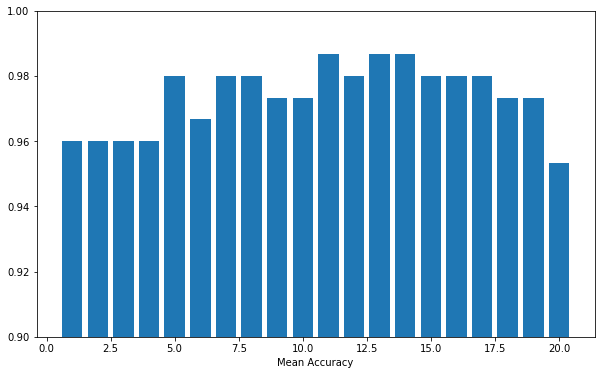

In [771]:
plt.subplots(figsize=(10,6))
plt.bar(n_neighbors,mean_knn_accuracy )
plt.ylim(0.9,1)
plt.xlabel("Number of K")
plt.xlabel("Mean Accuracy")


In [772]:
print((np.argmax(mean_knn_accuracy)+1), max(mean_knn_accuracy))

11 0.9866666666666667


In [777]:
## test and train accuracy for best K

print(mean_knn_accuracy_tr[10]) 
print(mean_knn_accuracy[10])


0.9733333333333333
0.9866666666666667


## Alternatively 
##### Another simple way to do the cross validation 

In [754]:
x_train=df.copy()
y_train=df['class']
x_train.drop(['class'],1, inplace=True)

In [755]:
from sklearn.model_selection import cross_val_score

In [756]:
K_n = range(1,21,2)

def accuracy(model):
    accuracy= cross_val_score(model, x_train, y_train,cv = 5)
    return(accuracy)
cv_KNN = [accuracy(KNeighborsClassifier(n_neighbors = k)).mean() 
            for k in K_n]
#cv_KNN = pd.Series(cv_KNN, index = K_n)

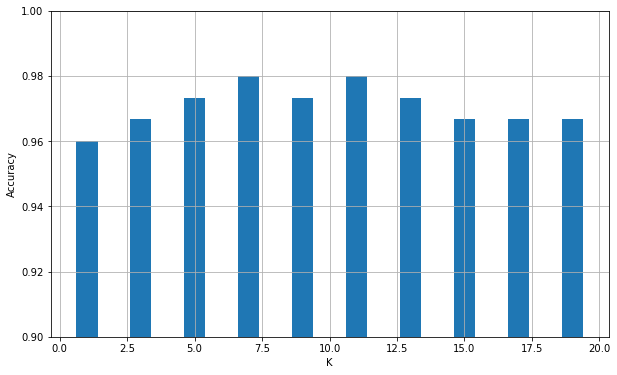

In [757]:
plt.figure(figsize=(10,6))
plt.bar(K_n,cv_KNN,)
plt.ylim(0.9, 1)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)

In [693]:
max(cv_KNN)

0.9800000000000001

## Question 4

Text(0, 0.5, 'Accuracy')

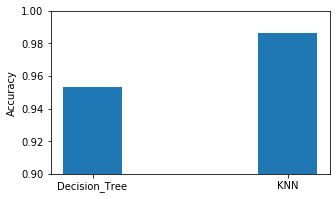

In [780]:
## plotting accuracy for knn and decision tree

plt.subplots(figsize=(5,3))
plt.bar(["Decision_Tree", "KNN"],[mean_accuracy_dt,max(mean_knn_accuracy)],width=0.3)
plt.ylim(0.9,1)
plt.ylabel("Accuracy")